# Multi Armed Bandit

A non-associative problem is chosen to understand exploration vs exploitation problem that occurs commonly in reinforcement learning problems. The problem here is an implementation of the ideas given in Sutton's book on reinforcement learning

Non-associative problem corresponds to when there is a single state and the goal of the agent is to learn the action that provides a maximum  reward. 

Associative problem there are multiple states each with a different reward distribution for actions. 

Finally, the reinforcement learning problem corresponds to an associative problem (mutiple states and actions), with an added constraint that the current action determines the next state. 

## Problem Statement

Consider a k-armed bandit. It can be viewed as k-slot machines, each with a lever. When a lever of a slot machine is pulled, it returns a reward. The reward returned by the slot machine is stochastic and is assumed to be drawn from a stationary distribution.

A single experiment is run for 1000 time steps. In each time step, a lever is chosen based on the algorithm of choice and the reward obtained by pulling the lever is stored. 

In every experiment, the true mean of the rewards of each bandit is set randomly

When a lever is pulled the reward returned is drawn from a normal distribution with variance 1 and mean set to the true mean given above. 

There are 2000 experiments run, the the goal is to observe which algorithm increases the average expected reward in the long run

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def bandit(k):
	return np.random.randn(k)

# Algorithm
def eps_greedy(eps,q_a):
	my_eps = np.random.rand(1)
	if my_eps>eps:
		return np.argmax(q_a)
	else:
		return np.random.randint(0,len(q_a))

In [3]:
def bandit_problem(k=10,NT=1000,eps=0.1,initial_value=0):
	q_t = bandit(k)
	r_t = np.zeros(NT)
	q_a = np.zeros(k) + initial_value
	n_a = np.zeros(k)
	

	for ival in range(NT):
		index = eps_greedy(eps,q_a)
		n_a[index] = n_a[index] + 1
		rval       = np.random.randn(1) + q_t[index]
		q_a[index] = q_a[index] + (1.0/n_a[index])*(rval - q_a[index])
		r_t[ival]  = rval
	return r_t  
		

Hello World
Running Bandit Problem


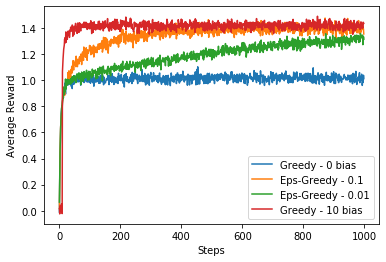

In [4]:

print("Hello World")
print('Running Bandit Problem')
nruns   = 2000
nsteps  = 1000
nbandits= 10
initial_bias = 0
r_greedy     = np.zeros(nsteps)
r_egreedy_01 = np.zeros(nsteps)
r_egreedy_001= np.zeros(nsteps)
r_optimistic = np.zeros(nsteps)
for iters in range(nruns):
    r_greedy      += bandit_problem(nbandits,nsteps,0,initial_bias)
    r_egreedy_01  += bandit_problem(nbandits,nsteps,0.1,initial_bias)		
    r_egreedy_001 += bandit_problem(nbandits,nsteps,0.01,initial_bias)
    r_optimistic  += bandit_problem(nbandits,nsteps,0,10)

r_greedy /= nruns
r_egreedy_01 /= nruns
r_egreedy_001 /= nruns
r_optimistic /= nruns

plt.plot(r_greedy,label = 'Greedy - 0 bias')
plt.plot(r_egreedy_01,label ='Eps-Greedy - 0.1' )
plt.plot(r_egreedy_001, label ='Eps-Greedy - 0.01' )
plt.plot(r_optimistic, label = 'Greedy - 10 bias')
plt.legend()
plt.ylabel('Average Reward')
plt.xlabel('Steps')

plt.show()
